## STAT 207 Lab 6: Central Limit Theorem and Confidence Intervals - [25 total points] - Solutions

Due: Wednesday, March 17 11:59pm CST <font color='green'>Happy St. Patrick's Day!</font>



## <u>Case Study</u>: U.S. County Home Ownership
In this lab we will explore the statistical concepts that we've learned this week while also examining the **homeownership rates** of the counties in the U.S. 

### Imports

In [1]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()                              # sets the default plotting style

## 1. <u>Preliminaries</u>

### 1a. [0.5 pt] Read the county.csv into a dataframe, call it df, and display the first five rows.

Remember that 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.

In [3]:
missing_values = ["data unavailable"]
df = pd.read_csv("county.csv", na_values = missing_values)
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


### 1b. [0.5pt] Display the shape of the dataframe.

In [57]:
df.shape

(3142, 15)

### 1.c. [0.5 pt] How many missing values does the homeownership rate variable have?

In [9]:
df.isna().sum().loc['homeownership']

0

Homeownership rate has 0 missing values.

## 2. <u>Central Limit Theorem Exploration</u>

### 2.a. Population of County Homeownership Rates

Let's assume that the homeownership rate in this dataset represents a **population**, where the population is the homeownership rates of ALL counties in the U.S.

#### 2.a.i. [0.5 pt] Calculate the population mean and the population standard deviation homeownership rates.

In [12]:
pop_mean_homeownership = df.mean().loc['homeownership']
print(pop_mean_homeownership)

73.26645448758752


In [13]:
pop_std_homeownership = df.std().loc['homeownership']
print(pop_std_homeownership)

7.831929689986538


#### 2.a.ii  [0.5 pt] Plot the population distribution of homeownership rates.

Make sure you label your x-axis and title appropriately.

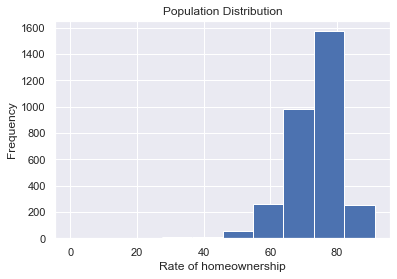

In [14]:
df['homeownership'].hist()
plt.title('Population Distribution')
plt.xlabel('Rate of homeownership')
plt.ylabel('Frequency')
plt.show()

### 2.b. Random Sample of County Homeownership Rates

#### 2.b.i. [1 pt] Collect a random sample of size 50 from this population (using a random state of 100) WITHOUT replacement.

In [15]:
sample = df.sample(50, random_state = 100, replace = False)

#### 2.b.ii.  [0.5 pt]  Calculate the mean and standard deviation of this sample.

In [51]:
sample_mean = sample.mean().loc['homeownership']
sample_mean

74.97800000000001

In [52]:
sample_std = sample.std().loc['homeownership']
sample_std

5.516220607981371

#### 2.b.iii.  [0.5 pt]  Plot the sample distribution.

Make sure that you label the x-axis and title appropriately.

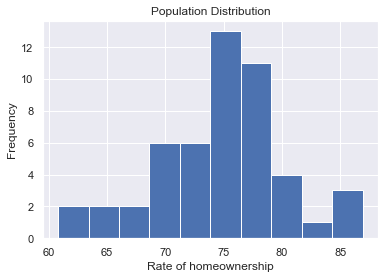

In [18]:
sample['homeownership'].hist()
plt.title('Population Distribution')
plt.xlabel('Rate of homeownership')
plt.ylabel('Frequency')
plt.show()

### 2.c. Sampling Distribution

Suppose we were to create a sampling distribution with many, many sample means homeownership rates, where each sample was of size 50 (drawn with replacement from the population of all county homeownership rates).

#### 2.c.i.  [1 pt]  What is the mean of this sampling distribution?

(Not looking for you to *actually* create a sampling distribution. What is the theoretical mean of this sampling distribution?)

The mean would be the same as the population mean, so 73.26645448758752.

In [19]:
print(pop_mean_homeownership)

73.26645448758752


#### 2.c.ii.  [1 pt]  What is the standard deviation of this sampling distribution?

(Not looking for you to *actually* create a sampling distribution. What is the *theoretical* standard deviation of this sampling distribution?)

The std would be the same as the population std, so 7.831929689986538.

In [20]:
print(pop_std_homeownership)

7.831929689986538


#### 2.c.iii.  [2 pt]  Will this sampling distribution of sample means be approximately normal? Explain why.

Yes, the sampling distribution of sample means will be approximately normal because the sample size 50 is greater than 30, so the central limit theorum condition is met. 

#### 2.c.iv.  [1 pt]  Calculate the probability that a randomly selected sample mean (from this sampling distribution) is greater than or equal to the sample mean that we calculated in (2.b). 

(You should assume in this case that you *do know* the population mean and standard deviation homeownership rates).

In [23]:
from scipy.stats import norm
1 - norm.cdf(sample.mean().loc['homeownership'], loc = pop_mean_homeownership, scale = pop_std_homeownership)

0.4135064063320041

#### 2.c.v.  [0.5 pt]  What is the value of a sample mean that is the same distance away from the population mean that our sample mean from 2b is, but is *less than* the population mean)?

In [47]:
critical_value=norm.ppf(1 - norm.cdf(sample.mean().loc['homeownership'], loc = pop_mean_homeownership, scale = pop_std_homeownership))
critical_value

-0.21853433063894462

The critical value is shown above, and we can find the value of the sample mean by using the equation:

z = (x-mu)/std
z(std)+mean = x

In [72]:
x = critical_value*pop_std_homeownership + pop_mean_homeownership
print(x)

71.55490897517504


#### 2.c.vi.  [1 pt] Calculate the probability that a randomly selected sample mean (from this sampling distribution) is less than or equal to the sample mean that we calculated in (2.c.v.). 

In [73]:
norm.cdf(x, loc = pop_mean_homeownership, scale = pop_std_homeownership)

0.4135064063320041

## 3. Confidence Intervals for a Population Mean

While we technically have the population of all U.S. county homeownership rates (and can therefore calculate the population mean), we would still like to calculate a confidence interval to learn more about how confidence intervals behave. (By having a population, it allows us to "check" our answers to see how well our confidence intervals did.)

### 3.a. First, we would like to construct a *single* 92% confidence interval for the average homeownership rate of ALL U.S. counties.

#### 3.a.i.  [1 pt]  Check the conditions for creating a confidence interval for average homeownership rate of ALL U.S. counties.

We know that the sample is collected randoml because 50 < 3142(.1) and 50 > 30, so the Central Limit Theorum is **valid**.

#### 3.a.ii.  [3 pt] Now create this 92% confidence interval using the random sample that you collected in 2b.

**ASSUME THAT YOU DO NOT KNOW WHAT THE POPULATION STANDARD DEVIATION HOMEOWNERSHIP RATE IS.**

In [77]:
criticalvalue = norm.ppf(.96)
lower_bound = sample_mean-criticalvalue*(sample_std/(sample.shape[0] ** 0.5))
upper_bound = sample_mean+criticalvalue*(sample_std/(sample.shape[0] ** 0.5))
print(lower_bound, ',', upper_bound)

73.61226983854658 , 76.34373016145344


#### 3.a.iii.  [1 pt]  Now interpret this confidence interval.

#### 3.a.iv.  [1 pt]  Because we *actually* know the population mean home ownership rate, check whether this population mean falls within this confidence interval you just calculated.

The population mean, 73.26645448758752 does not fall within this confidence interval of 73.61226983854658 , 76.34373016145344

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### <u> Tutorial</u> ANDS and ORS in if-statements

We can check multiple conditions in an if-statement by using the 'and' and the 'or' operators as shown below.


In [1]:
a=20

if a < 30 and a>10:
    print('a is between 10 and 30')
else:
    print('otherwise')

a is between 10 and 30


In [2]:
if a >= 30 or a <=10:
    print('a is at most 10 or at least 30')
else:
    print('otherwise')

otherwise


<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 3.b. Next, let's construct 1000 92% confidence intervals for the average homeownership rate of ALL U.S. counties.

#### 3.b.i.  [2 pt] Create a function that does the following.
* <u>Input</u> The input for your function should take in the following values.
    - a lower bound of a confidence interval
    - an upper bound of a confidence interval
    - a population mean $\mu$
* <u>What it does</u>
    - Your function should check whether $lower \: bound\leq \mu\leq upper\: bound$.
    - If this is the case, it should return True
    - If this is not the case, then it should return False.

In [69]:
def funct (lower_bound, upper_bound, mean):
    if mean >= lower_bound and mean <= upper_bound:
        return True
    else:
        return False

#### 3.b.ii.  [1 pt]  Test your function out using the population mean and the confidence interval from 3a.

In [78]:
funct(lower_bound, upper_bound, pop_mean_homeownership)

False

#### 3.b.iii.  [2 pt]  Using your function above to do the following:
* Collect 1000 random samples (each of size 50 without replacement) from the population of all U.S. county homeownership rates.
* Calculate the sample mean homeownership rate and sample standard deviation of each of these random samples.
* Create a 92% confidence interval around each of these sample means (assume that you don't know the population standard deviation).

What percent of these 1000 confidence intervals *actually* contained the population mean homeownership rate?

In [98]:
in_interval_count = 0
n_iterations = 1000

for i in range(n_iterations):
    new_sample = df.sample(50)
    mean = new_sample.mean().loc['homeownership']
    lower = new_sample.mean().loc['homeownership']-criticalvalue*(new_sample.std().loc['homeownership']/(new_sample.shape[0] ** 0.5))
    upper = new_sample.mean().loc['homeownership']+criticalvalue*(new_sample.std().loc['homeownership']/(new_sample.shape[0] ** 0.5))
    print(mean,)
    print(lower,)
    print(upper, '\n')
    if (funct(lower, upper, pop_mean_homeownership) == True):
        in_interval_count += 1

73.82
72.30959850252397
75.33040149747602 

73.434
71.5554685114588
75.3125314885412 

71.532
69.22588238936274
73.83811761063725 

73.384
71.54559514037317
75.22240485962683 

73.90400000000001
72.29992228774945
75.50807771225057 

72.972
71.38559742913154
74.55840257086845 

74.97399999999999
73.47219687116825
76.47580312883173 

74.454
72.75711708824302
76.15088291175697 

73.47999999999999
71.58630384429692
75.37369615570306 

71.17400000000002
68.93675448807534
73.4112455119247 

72.08200000000001
69.7562138804277
74.40778611957232 

72.932
70.88644019513036
74.97755980486964 

73.768
72.03666816858606
75.49933183141394 

72.74599999999998
70.76359367741483
74.72840632258513 

73.81599999999999
71.94914032475116
75.68285967524882 

71.738
69.61833775515198
73.85766224484802 

74.84400000000001
73.13487213812675
76.55312786187326 

74.46
72.62656493756766
76.29343506243232 

73.82
71.77793175155158
75.86206824844841 

72.68599999999999
71.01664863131847
74.35535136868151 

73.66
72

76.27
74.50903826087726
78.03096173912273 

73.926
72.0417886793722
75.8102113206278 

73.04799999999999
71.3136519663565
74.78234803364347 

74.09
72.70254198233818
75.47745801766183 

74.83800000000001
72.91499583051694
76.76100416948307 

73.58999999999999
71.76874892324133
75.41125107675865 

73.34
71.4796809564253
75.20031904357471 

71.58399999999999
69.59592147387059
73.57207852612939 

73.558
71.29170301918444
75.82429698081557 

72.28000000000002
70.17992714255689
74.38007285744314 

74.98
73.47019495564673
76.48980504435328 

74.164
72.27064897445996
76.05735102554004 

69.61999999999999
66.75538302484483
72.48461697515515 

72.446
70.44420821483064
74.44779178516936 

72.582
70.68356868676601
74.48043131323398 

74.26
72.66311294378241
75.8568870562176 

72.16199999999999
69.7154948348987
74.60850516510128 

71.52199999999999
69.33151095611137
73.71248904388861 

73.59200000000001
71.78502610910166
75.39897389089836 

72.74999999999999
71.11430356450533
74.38569643549464 

7

71.458
69.23695455158015
73.67904544841984 

72.206
70.3121690201392
74.09983097986081 

71.094
68.8863645351042
73.30163546489578 

73.22800000000001
70.57242526883196
75.88357473116805 

74.714
73.15647753899407
76.27152246100593 

72.78999999999999
70.6161475776048
74.96385242239518 

73.68
72.22459288415304
75.13540711584697 

74.82799999999999
72.87574166078764
76.78025833921234 

74.202
72.98532533461525
75.41867466538474 

73.796
72.1907061435812
75.40129385641882 

73.586
72.23471130901018
74.93728869098982 

73.89200000000001
72.32338623716605
75.46061376283397 

73.86
72.09562633714394
75.62437366285606 

73.692
71.86256876708232
75.52143123291766 

73.768
71.91758270882532
75.61841729117468 

73.146
71.17009776219142
75.12190223780858 

74.49
73.00804108043383
75.97195891956616 

73.686
71.93913380571566
75.43286619428436 

72.726
70.76186703203618
74.69013296796382 

76.414
75.26300548157457
77.56499451842544 

71.42
69.0324244425579
73.8075755574421 

73.044
71.39590033805

73.816
71.79008039316876
75.84191960683124 

74.134
72.75203153528807
75.51596846471193 

72.932
71.25019964515751
74.6138003548425 

71.312
69.4643010868011
73.1596989131989 

72.894
71.20862582392292
74.5793741760771 

74.388
72.7892915114297
75.98670848857032 

72.294
70.4733592493827
74.1146407506173 

73.68
71.7383887785399
75.62161122146011 

72.62
69.81937125902446
75.42062874097554 

73.53
71.43305532538774
75.62694467461226 

73.768
72.18333006231354
75.35266993768646 

73.84200000000001
72.22386711110391
75.46013288889611 

73.40599999999999
71.53864418257112
75.27335581742886 

72.718
71.23485604450167
74.20114395549834 

73.64200000000001
71.66936177822771
75.61463822177231 

73.28
71.25996965827514
75.30003034172486 

71.05199999999999
68.77639263225643
73.32760736774355 

73.494
71.61251541209354
75.37548458790646 

73.782
71.88809451095497
75.67590548904502 

74.024
72.45360306827249
75.59439693172752 

74.298
72.05428495624643
76.54171504375357 

73.8
71.9836271503005
7

73.828
72.08263094054779
75.57336905945222 

73.12
70.01519260365355
76.22480739634646 

72.142
70.63449939526214
73.64950060473785 

73.736
72.14740893814597
75.32459106185404 

71.72999999999999
69.6367035591696
73.82329644083038 

73.70599999999999
71.84402469807702
75.56797530192296 

73.55000000000001
71.94152755064319
75.15847244935684 

72.292
70.46436806779136
74.11963193220865 

73.668
72.0856922078023
75.25030779219772 

75.01400000000001
73.56976673163862
76.4582332683614 

73.42
71.76765636992486
75.07234363007514 

73.344
71.54783544119424
75.14016455880575 

72.934
70.92889632434398
74.93910367565601 

71.648
69.5375210635575
73.75847893644249 

73.872
71.89179199283333
75.85220800716667 

72.58599999999998
70.60239001599932
74.56960998400065 

73.112
71.22158565426759
75.0024143457324 

73.26199999999999
71.72553582518871
74.79846417481126 

73.96999999999998
72.26897864931077
75.6710213506892 

75.172
73.86704389511738
76.47695610488262 

74.298
72.43315083241151
76.162

72.65599999999999
71.16685873358794
74.14514126641204 

75.104
73.71653558074657
76.49146441925343 

72.554
70.82207743716995
74.28592256283005 

72.76
70.5970526949687
74.92294730503131 

74.14999999999999
72.33923340972726
75.96076659027273 

72.946
70.76737666714779
75.12462333285221 

73.142
71.22873819131085
75.05526180868914 

74.53399999999999
72.54025223123374
76.52774776876625 

73.874
72.02790523521237
75.72009476478762 

71.762
69.7162356389078
73.8077643610922 

72.586
70.66462207342427
74.50737792657573 

75.01799999999999
73.46368008211803
76.57231991788194 

73.898
71.9204821977121
75.87551780228789 

74.226
72.68577949084369
75.76622050915631 

73.822
72.00651382388826
75.63748617611175 

72.72399999999999
70.75595550899986
74.69204449100012 

71.97999999999999
70.24740733786926
73.71259266213072 

71.632
68.89503889918589
74.36896110081412 

73.21600000000001
71.44278316707012
74.9892168329299 

72.45400000000001
70.64642134186258
74.26157865813744 

73.32
71.558365289

In [101]:
print(in_interval_count/1000)

0.915


#### 3.b.iv.  [0.5 pt]  What is the difference between this percentage from (3.b.iii) and your confidence level?

In [104]:
print("There is a difference of", (.92-.915) * 100, "%")

There is a difference of 0.5000000000000004 %


## 4. More Probability

### 4a.  [0.5 pt]  What is the probability that we randomly select a county from the population that has a homeownership rate that is below 50%?

In [106]:
probability_50 = norm.cdf(50, loc = pop_mean_homeownership, scale = pop_std_homeownership)
probability_50

0.0014855222945504075

### 4.b. *Suppose* were to collect a random sample of 7 counties from the population of U.S. counties (with replacement). 

Don't *actually* take a random sample. This is a *theoretical* math problem.

#### 4.b.i.  [1 pt] What is the probability that 2 of these counties have a homeownership rate that is below 50%?

We know the probability of choosing a random county with a homeownership rate that is below 50% is about 0.0014855. So we can model this situation by doing:

(.0014855)^2(1-.0014855)^5

In [107]:
print((.0014855)**2 * (1-.0014855)**5)

2.1903685330356477e-06


#### 4.b.ii.  [1 pt]  What is the probability that at most 2 counties have a homeownership rate that is below 50%?

In [110]:
print(((.0014855)**2 * (1-.0014855)**5)+((.0014855)**1 * (1-.0014855)**6) + ((.0014855)**0 * (1-.0014855)**7))

0.9911222255339215
